KNN To Predict Iphone Sale

I have used a data set which consists of Gender, age, Salary and Purchase Iphone as the attributes.

Independent attributes consists of Gender, Age and Salary and the dependent attribute is Purchae Iphone. We will be predicting the possibility of a given person with Age and Salary and check whether the person will buy Iphone or not , we will take training and test models for checking our prediction. We will using KNN regression model for our prediction which will be implemented using Python.



In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

In [83]:

dataset = pd.read_csv('iphone_purchase_records.csv')
dataset.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [49]:
dataset.drop('Gender', axis=1, inplace=True)

In [50]:
dataset.head()

,Age,Salary,Purchase Iphone
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [51]:
X = dataset.drop('Purchase Iphone', axis=1)
y = dataset['Purchase Iphone']

In [52]:
print(X)
print(y)

     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


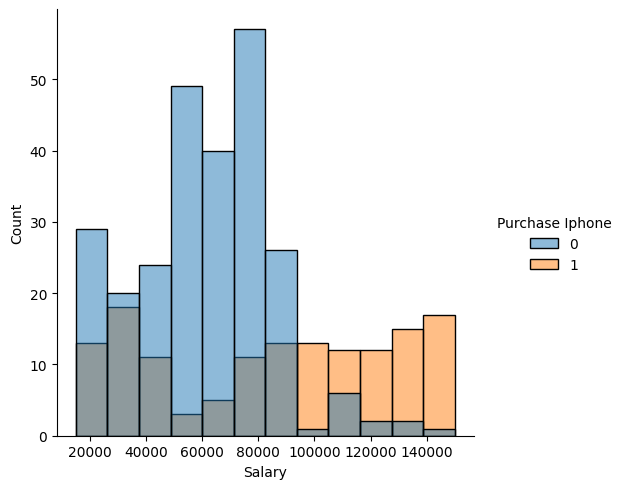

In [53]:
sns.displot(dataset, x='Salary', hue = 'Purchase Iphone')

In [54]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum(pt1-pt2)**2)
    return distance

a = np.array([3,4])
b = np.array([5,9])

print(euclidean_distance(a,b))

7.0


In [67]:
def KNN(X_train,X_test,y_train,y_test,k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))
        
        distance_data = pd.DataFrame(data=distances, columns=['distance'], index = y_train.index)
        
        k_neighbours_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        labels = y_train.loc[k_neighbours_list.index]
        
        voting = mode(labels,keepdims=True).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [76]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=5)

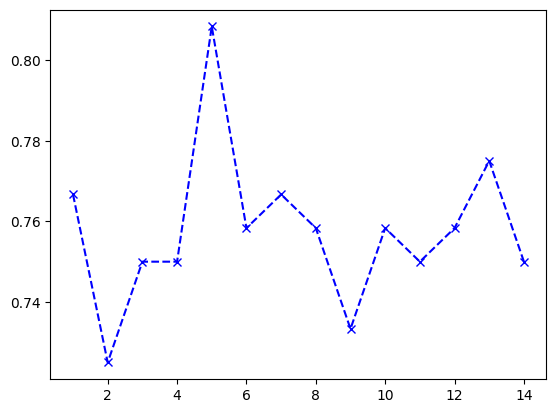

In [77]:
accuracy_vals = []
for i in range(1,15):
    y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=i)
    accuracy_vals.append(accuracy_score(y_test,y_hat_test))
plt.plot(range(1,15), accuracy_vals, color='blue', linestyle= 'dashed', marker='x')

0.8083333333333333


Text(0.5, 1.0, 'KNN Results')

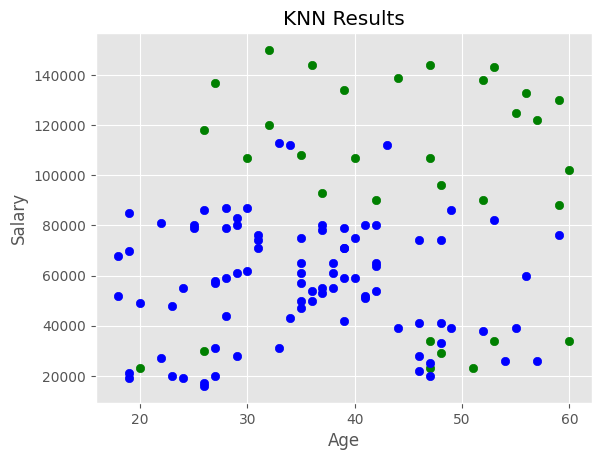

In [80]:
y_hat_test = KNN(X_train, X_test, y_train, y_test, k_val=5)
print(accuracy_score(y_test,y_hat_test))

for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color = 'blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['Age'], X_test.iloc[i]['Salary'], color = 'green')

plt.style.use('ggplot')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('KNN Results')

<AxesSubplot: xlabel='Age', ylabel='Salary'>

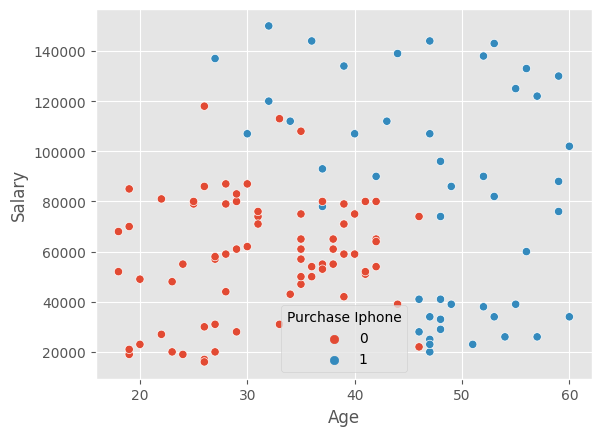

In [81]:
sns.scatterplot(data=dataset, x = X_test['Age'], y = X_test['Salary'], hue= 'Purchase Iphone')